<a href="https://colab.research.google.com/github/MayerT1/COLAB_DEV_GEDI-BDL/blob/main/NEON_Discrete_Lidar_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.neonscience.org/resources/learning-hub/tutorials/neon-discrete-point-clouds

R and Python guide: https://www.neonscience.org/resources/learning-hub/tutorials/neondatastackr

Introduction to NEON Discrete Lidar Data in Python

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pwd

/content


In [3]:
%cd /content/drive/MyDrive/PhD_Main_Folder/Geo_Data

/content/drive/MyDrive/PhD_Main_Folder/Geo_Data


In [ ]:
import os

folder_name = "Neon_PR_Data"

try:
    os.mkdir(folder_name)
    print(f"Folder '{folder_name}' created successfully.")
except FileExistsError:
    print(f"Folder '{folder_name}' already exists.")
except Exception as e:
    print(f"An error occurred: {e}")

Folder 'Neon_PR_Data' created successfully.


In [4]:
%cd /content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data
!pwd

/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data
/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data


In [5]:
data_root_path_1 = '/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data'

In [6]:
!pip install gdal

In [7]:
!pip install requests
# !pip install gdal
!pip install fiona
!pip install geopandas
!pip install rasterio
!pip install laspy
!pip install lazrs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.3/84.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.4/626.4 kB 7.2 MB/s eta 0:00:00


In [8]:
#import required packages
import os
import requests
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import laspy
import pandas as pd

Uncomment for download needs

In [ ]:
# url = "https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/tutorials/Python/AOP/aop_python_modules/neon_aop_download_functions.py"
# response = requests.get(url)
# open("neon_aop_download_functions.py", "wb").write(response.content)

6722

In [ ]:
# # check that script is saved in same folder:
# os.listdir()

['.config', 'neon_aop_download_functions.py', 'sample_data']

In [ ]:
# from neon_aop_download_functions import *

In [ ]:
# # %load neon_aop_download_functions.py
# """
# Created on Mon Apr  8 08:18:00 2019
# @author: bhass

# Functions to display available urls and download NEON AOP data using the NEON Data API.
# """

# import requests, urllib, os

# def list_available_urls(product,site):
#     """
#     list_available urls lists the api url for a given product and site
#     --------
#      Inputs:
#          product: the data product code (eg. 'DP3.30015.001' - CHM)
#          site: the 4-digit NEON site code (eg. 'SRER', 'JORN')
#     --------
#     Usage:
#     --------
#     jorn_chm_urls = list_available_urls('DP3.30015.001','JORN')
#     """
#     r = requests.get("http://data.neonscience.org/api/v0/products/" + product)
#     for i in range(len(r.json()['data']['siteCodes'])):
#         if site in r.json()['data']['siteCodes'][i]['siteCode']:
#             data_urls=r.json()['data']['siteCodes'][i]['availableDataUrls']
#     if 'data_urls' not in locals() or len(data_urls) == 0:
#         print('WARNING: no urls found for product ' + product + ' at site ' + site)
#     else:
#         return data_urls

# def list_available_urls_by_year(product,site,year):
#     """
#     list_available urls_by_year lists the api url for a given product, site, and year
#     --------
#      Inputs:
#          product: the data product code (eg. 'DP3.30015.001' - CHM)
#          site: the 4-digit NEON site code (eg. 'SRER', 'JORN')
#          year: the year data was collected (eg. '2017','2018','2019')
#     --------
#     Usage:
#     --------
#     jorn_chm_2018_url = list_available_urls_by_year('DP3.30015.001','JORN','2018')
#     """
#     r = requests.get("http://data.neonscience.org/api/v0/products/" + product)
#     for i in range(len(r.json()['data']['siteCodes'])):
#         if site in r.json()['data']['siteCodes'][i]['siteCode']:
#             all_data_urls=r.json()['data']['siteCodes'][i]['availableDataUrls']
#     data_urls = [url for url in all_data_urls if year in url]
#     if len(data_urls)==0:
#         print('WARNING: no urls found for product ' + product + ' at site ' + site + ' in year ' + year)
#     else:
#         return data_urls

# def download_urls(url_list,download_folder_root,zip=False):
#     # downloads data from urls to folder, maintaining month-year folder structure
#     for url in url_list:
#         month = url.split('/')[-1]
#         download_folder = download_folder_root + month + '/'
#         if not os.path.exists(download_folder):
#             os.makedirs(download_folder)
#         r=requests.get(url)
#         files=r.json()['data']['files']
#         for i in range(len(files)):
#             if zip==False:
#                 if '.zip' not in files[i]['name']:
#                     print('downloading ' + files[i]['name'] + ' to ' + download_folder)
#                     urllib.request.urlretrieve(files[i]['url'],download_folder + files[i]['name'])
#             elif zip==True:
#                 if '.zip' in files[i]['name']:
#                     print('downloading ' + files[i]['name'] + ' to ' + download_folder)
#                     urllib.request.urlretrieve(files[i]['url'],download_folder + files[i]['name'])

# def download_file(url,filename):
#     r = requests.get(url)
#     with open(filename, 'wb') as f:
#         for chunk in r.iter_content(chunk_size=1024):
#             if chunk: # filter out keep-alive new chunks
#                 f.write(chunk)
#     return

# def get_file_size(urls,match_string):
#     size=0
#     for url in urls:
#         r = requests.get(url)
#         files = r.json()['data']['files']
#         for i in range(len(files)):
#             if match_string is not None:
#                 if match_string in files[i]['name']:
#     #             print('downloading ' + files[i]['name'] + ' to ' + download_folder)
#                     size += int(files[i]['size'])
#             else:
#                 size += int(files[i]['size'])
#     if size < 10**3:
#         print('Download size:',size,'bytes')
#     elif size > 10**3 and size < 10**6:
#         print('Download size:',round(size/(10**6),2),'kB')
#     elif size > 10**6 and size < 10**9:
#         print('Download size:',round(size/(10**6),2),'MB')
#     elif size > 10**9 and size < 10**12:
#         print('Download size:',round(size/(10**9),2),'GB')
#     else:
#         print('Download size:',round(size/(10**12),2),'TB')
#     return size

# def download_aop_files(product,site,year=None,download_folder='./data',match_string=None,check_size=True):
#     """
#     download_aop_files downloads NEON AOP files from the AOP for a given data product, site, and
#     optional year, download folder, and
#     --------
#      Inputs:
#          required:
#              product: the data product code (eg. 'DP3.30015.001' - CHM)
#              site: the 4-digit NEON site code (eg. 'SRER', 'JORN')

#          optional:
#              year: year (eg. '2020'); default (None) is all years
#              download_folder: folder to store downloaded files; default (./data) in current directory
#              match_string: subset of data to match, need to use exact pattern for file name
#              check_size: prompt to continue download (y/n) after displaying size; default = True
#     --------
#     Usage:
#     --------
#     download_aop_files('DP3.30015.001','JORN','2019','./data/JORN_2019/CHM','314000_3610000_CHM.tif')
#     """

#     #get a list of the urls for a given data product, site, and year (if included)
#     if year is not None:
#         urls = list_available_urls_by_year(product,site,year)
#     else:
#         urls = list_available_urls(product,site)

#     #make the download folder if it doesn't already exist
#     if not os.path.exists(download_folder):
#         os.makedirs(download_folder)

#     #get the size of all the files you are planning to download
#     size = get_file_size(urls,match_string)

#     #prompt to continue with download after displaying the file size
#     if check_size:
#         if input("Do you want to continue with the download? (y/n) ") != "y":
#             print('Exiting download_aop_files')
#             return

#     #download files in the urls
#     for url in urls:
#         r = requests.get(url)
#         files = r.json()['data']['files']
#         for i in range(len(files)):
#             if match_string is not None:
#                 if match_string in files[i]['name']:
#                     print('downloading ' + files[i]['name'] + ' to ' + download_folder)
#                     try:
#                         download_file(files[i]['url'],os.path.join(download_folder,files[i]['name']))
#                     except requests.exceptions.RequestException as e:
#                         print(e)
#             else:
#                 try:
#                     download_file(files[i]['url'],os.path.join(download_folder,files[i]['name']))
#                 except requests.exceptions.RequestException as e:
#                     print(e)


In [ ]:
# %whos

Variable                      Type        Data/Info
---------------------------------------------------
download_aop_files            function    <function download_aop_files at 0x7bfbc3424b80>
download_file                 function    <function download_file at 0x7bfbc3424220>
download_urls                 function    <function download_urls at 0x7bfbc3424a40>
get_file_size                 function    <function get_file_size at 0x7bfbc3424c20>
gpd                           module      <module 'geopandas' from <...>s/geopandas/__init__.py'>
laspy                         module      <module 'laspy' from '/us<...>kages/laspy/__init__.py'>
list_available_urls           function    <function list_available_urls at 0x7bfbc3424860>
list_available_urls_by_year   function    <function list_available_<...>y_year at 0x7bfbc3424400>
np                            module      <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
os                            module      <module 'os' (frozen)>
plt

In [9]:
dpID='DP1.30003.001'
site = 'GUAN'

In [10]:
# list_available_urls(dpID,site)

NameError: name 'list_available_urls' is not defined

In [11]:
year='2018'
data_root_path = data_root_path_1+'/'+site+'/'+year+'/'
shp_path = data_root_path+'shp/'
kml_path = data_root_path+'kml/'
laz_path = data_root_path+'laz/'
print(data_root_path)

/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN/2018/


In [12]:
!pwd

/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data


# LIDAR

Uncomment for download needs

In [ ]:
# #download the QA reports to the default download directory (./data)
# download_aop_files(dpID,site,year,match_string='.pdf',check_size=False)

Download size: 20.95 MB
downloading 2018051112_P2C1_SBET_QAQC.pdf to ./data
downloading 2018051313_P2C1_SBET_QAQC.pdf to ./data
downloading 2018_GUAN_1_L1_discrete_lidar_processing.pdf to ./data
downloading 2018_GUAN_1_L3_discrete_lidar_processing.pdf to ./data
downloading 2018051012_P2C1_SBET_QAQC.pdf to ./data
downloading 2018052012_P2C1_SBET_QAQC.pdf to ./data


In [ ]:
# #download the full-boundary shape files
# download_aop_files(dpID,site,year,shp_path,'merged_tiles.shp',check_size=False)
# download_aop_files(dpID,site,year,shp_path,'merged_tiles.shx',check_size=False)

Download size: 0.78 kB
downloading 2018_GUAN_1_merged_tiles.shp to /content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN/2018/shp/
Download size: 0.0 kB
downloading 2018_GUAN_1_merged_tiles.shx to /content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN/2018/shp/


In [13]:
os.listdir(shp_path)

['2018_GUAN_1_merged_tiles.shp', '2018_GUAN_1_merged_tiles.shx']

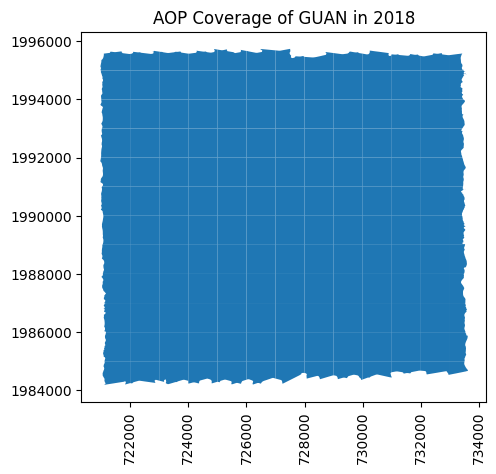

In [14]:
gdf = gpd.read_file(os.path.join(shp_path,'2018_GUAN_1_merged_tiles.shp'))
gdf.plot();
ax = plt.gca(); ax.ticklabel_format(style='plain')
ax.set_title('AOP Coverage of ' + site + ' in ' + year);
plt.xticks(rotation=90); #optionally rotate the xtick labels

In [ ]:
# download_aop_files(dpID,site,year,kml_path,'full_boundary.kml',check_size=False)

Download size: 0.13 kB
downloading NEON_D04_GUAN_DP1_2018_full_boundary.kml to /content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN/2018/kml/


In [ ]:
# download_aop_files('DP1.30003.001',site,year,laz_path,match_string='725000_1985000_classified_point_cloud_colorized.laz')

Download size: 18.0 MB
Do you want to continue with the download? (y/n) y
downloading NEON_D04_GUAN_DP1_725000_1985000_classified_point_cloud_colorized.laz to /content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN/2018/laz/


In [15]:
os.listdir(laz_path)

['NEON_D04_GUAN_DP1_725000_1985000_classified_point_cloud_colorized.laz']

In [16]:
# use os.path.join to get the full path of the laz file
laz_data_file=os.path.join(laz_path,'NEON_D04_GUAN_DP1_725000_1985000_classified_point_cloud_colorized.laz')
# read the laz file into a LasData object using laspy.read()
point_cloud=laspy.read(laz_data_file)

In [17]:
point_cloud

<LasData(1.3, point fmt: <PointFormat(3, 4 bytes of extra dims)>, 2968778 points, 2 vlrs)>

In [18]:
list(point_cloud.point_format.dimension_names)

['X',
 'Y',
 'Z',
 'intensity',
 'return_number',
 'number_of_returns',
 'scan_direction_flag',
 'edge_of_flight_line',
 'classification',
 'synthetic',
 'key_point',
 'withheld',
 'scan_angle_rank',
 'user_data',
 'point_source_id',
 'gps_time',
 'red',
 'green',
 'blue',
 'reversible index (lastile)']

In [19]:
point_cloud.classification

<SubFieldView([2 2 2 ... 7 7 7])>

In [20]:
set(list(point_cloud.classification))

{1, 2, 5, 6, 7}

In [21]:
point_cloud.xyz

array([[ 7.25894810e+05,  1.98500265e+06,  2.50000000e-01],
       [ 7.25915210e+05,  1.98500018e+06,  4.20000000e-01],
       [ 7.25893550e+05,  1.98500798e+06,  2.20000000e-01],
       ...,
       [ 7.25085510e+05,  1.98583553e+06, -1.80370000e+02],
       [ 7.25101320e+05,  1.98584004e+06, -2.37230000e+02],
       [ 7.25122790e+05,  1.98583813e+06, -3.05320000e+02]])

In [22]:
xyz = point_cloud.xyz

In [23]:
factor=10
points_dec = xyz[::factor]

In [24]:
# points = np.vstack((point_cloud.x, point_cloud.y, point_cloud.z)).transpose()
colors = np.vstack((point_cloud.red, point_cloud.green, point_cloud.blue)).transpose()

In [25]:
colors_norm = (colors - np.min(colors))/np.ptp(colors)
colors_dec = colors_norm[::factor]

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

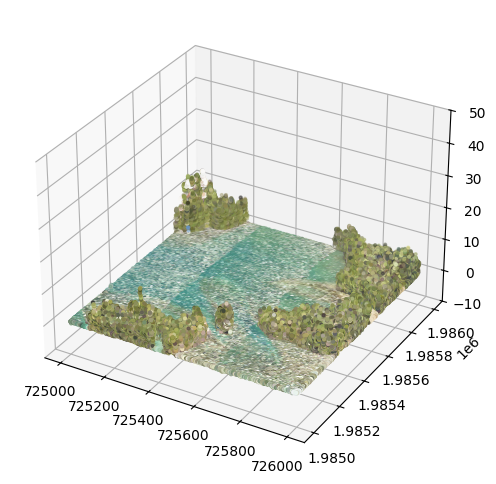

In [27]:
# Plot the las data in 3D
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_dec[:,0],points_dec[:,1],points_dec[:,2],color=colors_dec,s=4)
ax.set_zlim3d(-10,50)
plt.show()

In [28]:
import rasterio
from rasterio.plot import show

In [30]:
l3_path = data_root_path+'L3/'

Uncomment for download needs

In [ ]:
# download_aop_files('DP3.30015.001',site,year,l3_path,match_string='725000_1985000_CHM.tif',check_size=False)
# download_aop_files('DP3.30024.001',site,year,l3_path,match_string='725000_1985000_DTM.tif',check_size=False)
# download_aop_files('DP3.30024.001',site,year,l3_path,match_string='725000_1985000_DSM.tif',check_size=False)

Download size: 4.02 MB
downloading NEON_D04_GUAN_DP3_725000_1985000_CHM.tif to /content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN/2018/L3/
Download size: 4.01 MB
downloading NEON_D04_GUAN_DP3_725000_1985000_DTM.tif to /content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN/2018/L3/
Download size: 4.01 MB
downloading NEON_D04_GUAN_DP3_725000_1985000_DSM.tif to /content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN/2018/L3/


In [31]:
chm = rasterio.open(os.path.join(l3_path,'NEON_D04_GUAN_DP3_725000_1985000_CHM.tif'))
dtm = rasterio.open(os.path.join(l3_path,'NEON_D04_GUAN_DP3_725000_1985000_DTM.tif'))
dsm = rasterio.open(os.path.join(l3_path,'NEON_D04_GUAN_DP3_725000_1985000_DSM.tif'))

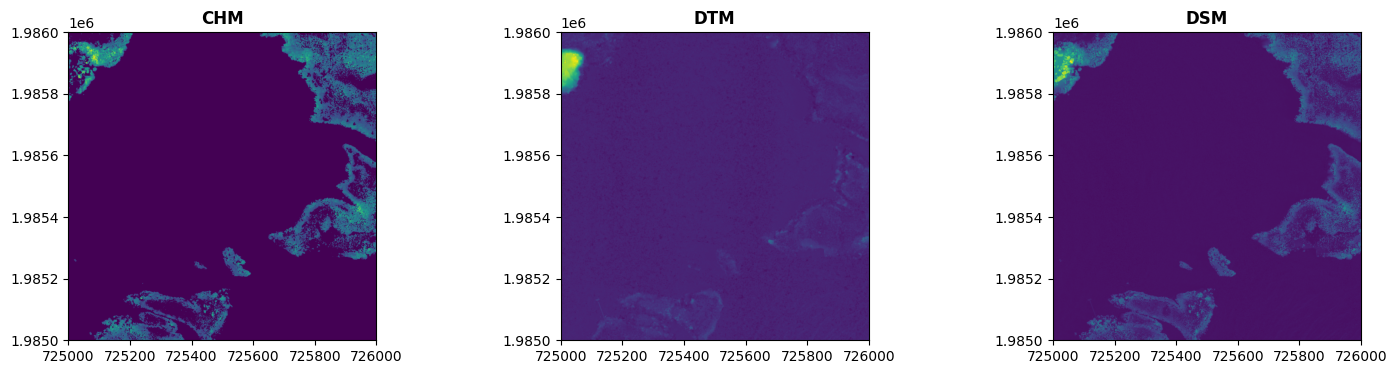

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,4))
show((chm), ax=ax1, title='CHM');
show((dtm), ax=ax2, title='DTM');
show((dsm), ax=ax3, title='DSM');
plt.show;

# Dev space

https://www.neonscience.org/resources/learning-hub/tutorials/discrete-lidar-wildfires

In [39]:
!pwd

/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data


In [40]:
%cd /content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN/2018/laz

/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN/2018/laz


In [41]:
## Function to import las file as a dataframe in python
def las_to_df(las):
  x = pd.DataFrame(np.array(las.x))
  y = pd.DataFrame(np.array(las.y))
  z = pd.DataFrame(np.array(las.z))
  intensity = pd.DataFrame(np.array(las.intensity))
  return_num = pd.DataFrame(np.array(las.return_number))
  number_of_returns = pd.DataFrame(np.array(las.number_of_returns))
  classification = pd.DataFrame(np.array(las.classification)) ## 0 - 31 as per ASPRS classification scheme

  df = pd.concat([x, y, z, intensity, return_num, number_of_returns, classification], axis=1)
  df.columns=["x", "y", "z", "intensity", "return_num", "number_of_returns", "classification"]
  return(df)

In [42]:
point_cloud_df = las_to_df(point_cloud)

In [43]:
point_cloud_df

,x,y,z,intensity,return_num,number_of_returns,classification
0,725894.81,1985002.65,0.25,1,1,1,2
1,725915.21,1985000.18,0.42,1,1,1,2
2,725893.55,1985007.98,0.22,1,1,1,2
3,725920.37,1985002.03,0.36,1,1,1,2
4,725919.61,1985002.27,0.43,1,1,1,2
...,...,...,...,...,...,...,...
2968773,725032.27,1985784.28,0.18,1,1,1,7
2968774,725028.81,1985785.23,0.23,1,1,1,7
2968775,725085.51,1985835.53,-180.37,2,2,2,7
2968776,725101.32,1985840.04,-237.23,2,2,2,7


In [44]:
point_cloud_df_high_veg = point_cloud_df[point_cloud_df["classification"] == 5]

In [45]:
-point_cloud_df_high_veg

,x,y,z,intensity,return_num,number_of_returns,classification
11828,-725931.50,-1985260.74,-2.56,65534,255,255,251
11832,-725927.35,-1985261.75,-2.52,65535,255,255,251
11835,-725925.31,-1985262.25,-2.31,65532,255,255,251
11839,-725927.27,-1985261.84,-2.48,65535,255,255,251
11844,-725931.65,-1985260.78,-2.22,65533,255,255,251
...,...,...,...,...,...,...,...
2957723,-725128.00,-1985964.64,-2.82,65528,255,255,251
2957724,-725127.94,-1985964.66,-2.63,65528,255,255,251
2957725,-725127.74,-1985964.71,-2.70,65529,255,255,251
2958134,-725128.93,-1985965.59,-2.66,65527,255,255,251


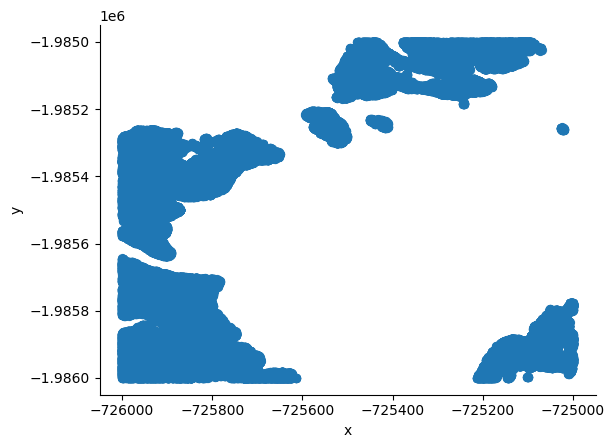

In [38]:
from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='x', y='y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Combine forest inventory/measures with LIDAR obs

In [46]:
! pip install neonutilities

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.3/83.3 kB 3.0 MB/s eta 0:00:00


In [49]:
!pwd

/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN


In [48]:
%cd /content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN

/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN


In [ ]:
# import os

# folder_name = "Veg_Field_Data"

# try:
#     os.mkdir(folder_name)
#     print(f"Folder '{folder_name}' created successfully.")
# except FileExistsError:
#     print(f"Folder '{folder_name}' already exists.")
# except Exception as e:
#     print(f"An error occurred: {e}")

Folder 'Veg_Field_Data' created successfully.


In [50]:
%cd /content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN/Veg_Field_Data

/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN/Veg_Field_Data


In [55]:
import neonutilities as neon
import os

# Define the parameters
dpid = "DP1.10098.001"  # Data product ID#
site = "GUAN"  # Site ID
package = "basic"
release = "RELEASE-2023"

# Define the output directory
veg_folder = '/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN/Veg_Field_Data'
output_dir = veg_folder

# Download and load the data
#neon.download_data(dpID, site=site, package=package, release=release, output_dir=output_dir)
veglist = neon.load_by_product(dpid=dpid, site=site, package=package, release=release)


# # Load the data
# veglist = neon.load_data(output_dir)
veglist.keys()

# # Display the available data tables
print(veglist.keys())


100%|██████████| 29/29 [00:16<00:00,  1.77it/s]


Continuing will download 29 files totaling approximately 78.8 MB. Do you want to proceed? (y/n) y


100%|██████████| 5/5 [00:01<00:00,  3.69it/s]


dict_keys(['categoricalCodes_10098', 'citation_10098_RELEASE-2023', 'issueLog_10098', 'readme_10098', 'validation_10098', 'variables_10098', 'vst_apparentindividual', 'vst_mappingandtagging', 'vst_non-woody', 'vst_perplotperyear', 'vst_shrubgroup'])


In [ ]:
veglist

In [ ]:
# # Modify the file path to the file location on your computer
# stack = neon.stack_by_table('/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN/Veg_Field_Data')
# stack

Hack 3 converting this R script : https://github.com/NEONScience/NEON-geolocation/blob/main/geoNEON/R/getLocVSTmapped.R

https://github.com/NEONScience/NEON-geolocation/blob/main/geoNEON/R/getLocByName.R

In [103]:
!pip install git+https://github.com/weecology/neonwranglerpy.git

  Cloning https://github.com/weecology/neonwranglerpy.git to /tmp/pip-req-build-zxkq6zas
  Running command git clone --filter=blob:none --quiet https://github.com/weecology/neonwranglerpy.git /tmp/pip-req-build-zxkq6zas
  Resolved https://github.com/weecology/neonwranglerpy.git to commit 3a35ad3858de1c0add2de469b8c6af2293bb8686
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.8/171.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 5

In [105]:
!pwd

/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN/Veg_Field_Data


In [109]:
# %load_ext rpy2.ipython

In [ ]:
%%R
install.packages("neonUtilities")
install.packages("neonOS")
install.packages("terra")
install.packages("devtools")
devtools::install_github("NEONScience/NEON-geolocation/geoNEON")

(as ‘lib’ is unspecified)


































	‘/tmp/Rtmp2qUADz/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp2qUADz/downloaded_packages’

(as ‘lib’ is unspecified)








In [ ]:
# %%R
# library(terra)
# library(neonUtilities)
# library(neonOS)
# library(geoNEON)

In [110]:
# %%R
# x <- 42
# print(x)

[1] 42


-break

In [95]:
vegmap = veglist['vst_mappingandtagging']
vegmap

,uid,namedLocation,date,eventID,domainID,siteID,plotID,subplotID,nestedSubplotID,pointID,...,identificationReferences,morphospeciesID,morphospeciesIDRemarks,identificationQualifier,remarks,measuredBy,recordedBy,dataQF,publicationDate,release
0,02d00b0f-39d2-40c3-b02d-bf988d8100d3,GUAN_044.basePlot.vst,2013-04-04,vst_GUAN_2017,D04,GUAN,GUAN_044,39,,,...,,,,,,tvelazquez-rojas@battelleecology.org,amegill@battelleecology.org,,20230109T191001Z,RELEASE-2023
1,9a9fe780-07e1-4067-9697-97ab3055f23a,GUAN_043.basePlot.vst,2015-05-12,vst_GUAN_2015,D04,GUAN,GUAN_043,39,1,,...,,,,,,emartinez@field-ops.org,wplaza-muniz@field-ops.org,,20230109T191001Z,RELEASE-2023
2,cdc0b2d9-c155-4c0a-bf1d-89689e197456,GUAN_043.basePlot.vst,2015-05-12,vst_GUAN_2015,D04,GUAN,GUAN_043,39,1,,...,,,,,,emartinez@field-ops.org,wplaza-muniz@field-ops.org,,20230109T191001Z,RELEASE-2023
3,6dea2800-66f0-49aa-8320-3a5efcd218e0,GUAN_043.basePlot.vst,2015-05-12,vst_GUAN_2015,D04,GUAN,GUAN_043,39,1,,...,,,,,,emartinez@field-ops.org,wplaza-muniz@field-ops.org,,20230109T191001Z,RELEASE-2023
4,d35a6ed8-7941-46fe-a8ed-37a037a5bde2,GUAN_043.basePlot.vst,2015-05-12,vst_GUAN_2015,D04,GUAN,GUAN_043,39,1,,...,,,,,,wplaza-muniz@field-ops.org,adavila@neoninc.org,,20230109T191001Z,RELEASE-2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7352,8c8c2fe4-b316-4736-b8ca-7ff4870d619a,GUAN_017.basePlot.vst,2022-09-01,vst_GUAN_2022,D04,GUAN,GUAN_017,21,,31,...,,,,,,0000-0002-9129-5419,0000-0002-6589-9569,,20230109T191001Z,RELEASE-2023
7353,4390ae49-8a20-411d-a27c-62d35c3bfe98,GUAN_016.basePlot.vst,2022-09-01,vst_GUAN_2022,D04,GUAN,GUAN_016,41,,51,...,,,,,,0000-0002-9129-5419,0000-0002-6589-9569,,20230109T191001Z,RELEASE-2023
7354,c09f3dd0-b4e7-4635-b101-85adbf462fab,GUAN_010.basePlot.vst,2022-10-04,vst_GUAN_2022,D04,GUAN,GUAN_010,32,,33,...,,,,,,0000-0002-9129-5419,0000-0002-6589-9569,,20230109T191001Z,RELEASE-2023
7355,738b8e59-f9c1-4340-a3ed-bc5171d52e3d,GUAN_009.basePlot.vst,2022-10-12,vst_GUAN_2022,D04,GUAN,GUAN_009,41,,41,...,,,,,,0000-0002-9129-5419,0000-0002-6589-9569,,20230109T191001Z,RELEASE-2023


In [ ]:
# Apply the function
refined_data = get_loc_vst_mapped(veg_data, plot_centers)

# Display results
print(refined_data)

In [94]:
# Print column names using a loop
for col in vegmap.columns:
    print(col)

# Print column names as a list
print(vegmap.columns.tolist())

uid
namedLocation
date
eventID
domainID
siteID
plotID
subplotID
nestedSubplotID
pointID
stemDistance
stemAzimuth
recordType
individualID
supportingStemIndividualID
previouslyTaggedAs
samplingProtocolVersion
taxonID
scientificName
taxonRank
identificationReferences
morphospeciesID
morphospeciesIDRemarks
identificationQualifier
remarks
measuredBy
recordedBy
dataQF
publicationDate
release
['uid', 'namedLocation', 'date', 'eventID', 'domainID', 'siteID', 'plotID', 'subplotID', 'nestedSubplotID', 'pointID', 'stemDistance', 'stemAzimuth', 'recordType', 'individualID', 'supportingStemIndividualID', 'previouslyTaggedAs', 'samplingProtocolVersion', 'taxonID', 'scientificName', 'taxonRank', 'identificationReferences', 'morphospeciesID', 'morphospeciesIDRemarks', 'identificationQualifier', 'remarks', 'measuredBy', 'recordedBy', 'dataQF', 'publicationDate', 'release']


In [69]:
vegmap

,uid,namedLocation,date,eventID,domainID,siteID,plotID,subplotID,nestedSubplotID,pointID,...,identificationReferences,morphospeciesID,morphospeciesIDRemarks,identificationQualifier,remarks,measuredBy,recordedBy,dataQF,publicationDate,release
0,02d00b0f-39d2-40c3-b02d-bf988d8100d3,GUAN_044.basePlot.vst,2013-04-04,vst_GUAN_2017,D04,GUAN,GUAN_044,39,,,...,,,,,,tvelazquez-rojas@battelleecology.org,amegill@battelleecology.org,,20230109T191001Z,RELEASE-2023
1,9a9fe780-07e1-4067-9697-97ab3055f23a,GUAN_043.basePlot.vst,2015-05-12,vst_GUAN_2015,D04,GUAN,GUAN_043,39,1,,...,,,,,,emartinez@field-ops.org,wplaza-muniz@field-ops.org,,20230109T191001Z,RELEASE-2023
2,cdc0b2d9-c155-4c0a-bf1d-89689e197456,GUAN_043.basePlot.vst,2015-05-12,vst_GUAN_2015,D04,GUAN,GUAN_043,39,1,,...,,,,,,emartinez@field-ops.org,wplaza-muniz@field-ops.org,,20230109T191001Z,RELEASE-2023
3,6dea2800-66f0-49aa-8320-3a5efcd218e0,GUAN_043.basePlot.vst,2015-05-12,vst_GUAN_2015,D04,GUAN,GUAN_043,39,1,,...,,,,,,emartinez@field-ops.org,wplaza-muniz@field-ops.org,,20230109T191001Z,RELEASE-2023
4,d35a6ed8-7941-46fe-a8ed-37a037a5bde2,GUAN_043.basePlot.vst,2015-05-12,vst_GUAN_2015,D04,GUAN,GUAN_043,39,1,,...,,,,,,wplaza-muniz@field-ops.org,adavila@neoninc.org,,20230109T191001Z,RELEASE-2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7352,8c8c2fe4-b316-4736-b8ca-7ff4870d619a,GUAN_017.basePlot.vst,2022-09-01,vst_GUAN_2022,D04,GUAN,GUAN_017,21,,31,...,,,,,,0000-0002-9129-5419,0000-0002-6589-9569,,20230109T191001Z,RELEASE-2023
7353,4390ae49-8a20-411d-a27c-62d35c3bfe98,GUAN_016.basePlot.vst,2022-09-01,vst_GUAN_2022,D04,GUAN,GUAN_016,41,,51,...,,,,,,0000-0002-9129-5419,0000-0002-6589-9569,,20230109T191001Z,RELEASE-2023
7354,c09f3dd0-b4e7-4635-b101-85adbf462fab,GUAN_010.basePlot.vst,2022-10-04,vst_GUAN_2022,D04,GUAN,GUAN_010,32,,33,...,,,,,,0000-0002-9129-5419,0000-0002-6589-9569,,20230109T191001Z,RELEASE-2023
7355,738b8e59-f9c1-4340-a3ed-bc5171d52e3d,GUAN_009.basePlot.vst,2022-10-12,vst_GUAN_2022,D04,GUAN,GUAN_009,41,,41,...,,,,,,0000-0002-9129-5419,0000-0002-6589-9569,,20230109T191001Z,RELEASE-2023


from matplotlib import pyplot as plt
vegmap['stemDistance'].plot(kind='hist', bins=20, title='stemDistance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
vegmap['stemAzimuth'].plot(kind='hist', bins=20, title='stemAzimuth')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
vegmap.groupby('subplotID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
vegmap.groupby('nestedSubplotID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
vegmap.groupby('recordType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
vegmap.groupby('previouslyTaggedAs').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
vegmap.plot(kind='scatter', x='stemDistance', y='stemAzimuth', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<string>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['stemDistance']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = vegmap.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('subplotID')):
  _plot_series(series, series_name, i)
  fig.legend(title='subplotID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('stemDistance')

<string>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['stemDistance']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = vegmap.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('nestedSubplotID')):
  _plot_series(series, series_name, i)
  fig.legend(title='nestedSubplotID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('stemDistance')

<string>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['stemDistance']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = vegmap.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('recordType')):
  _plot_series(series, series_name, i)
  fig.legend(title='recordType', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('stemDistance')

<string>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['stemDistance']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = vegmap.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('previouslyTaggedAs')):
  _plot_series(series, series_name, i)
  fig.legend(title='previouslyTaggedAs', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('stemDistance')

from matplotlib import pyplot as plt
vegmap['stemDistance'].plot(kind='line', figsize=(8, 4), title='stemDistance')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
vegmap['stemAzimuth'].plot(kind='line', figsize=(8, 4), title='stemAzimuth')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['nestedSubplotID'].value_counts()
    for x_label, grp in vegmap.groupby('subplotID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('subplotID')
_ = plt.ylabel('nestedSubplotID')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['recordType'].value_counts()
    for x_label, grp in vegmap.groupby('nestedSubplotID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('nestedSubplotID')
_ = plt.ylabel('recordType')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['previouslyTaggedAs'].value_counts()
    for x_label, grp in vegmap.groupby('recordType')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('recordType')
_ = plt.ylabel('previouslyTaggedAs')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['samplingProtocolVersion'].value_counts()
    for x_label, grp in vegmap.groupby('previouslyTaggedAs')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('previouslyTaggedAs')
_ = plt.ylabel('samplingProtocolVersion')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(vegmap['subplotID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(vegmap, x='stemDistance', y='subplotID', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(vegmap['nestedSubplotID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(vegmap, x='stemDistance', y='nestedSubplotID', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(vegmap['recordType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(vegmap, x='stemDistance', y='recordType', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(vegmap['previouslyTaggedAs'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(vegmap, x='stemDistance', y='previouslyTaggedAs', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [62]:

x1 = veglist['vst_apparentindividual']
y1 = veglist['vst_mappingandtagging']

frames = [x1, y1]

veg = pd.concat(frames)
veg

,uid,namedLocation,date,eventID,domainID,siteID,plotID,individualID,tempStemID,tagStatus,...,supportingStemIndividualID,previouslyTaggedAs,samplingProtocolVersion,taxonID,scientificName,taxonRank,identificationReferences,morphospeciesID,morphospeciesIDRemarks,identificationQualifier
0,50f23a1c-e72e-4429-9be4-3ddd70ddbefe,GUAN_002.basePlot.vst,2015-08-13,vst_GUAN_2015,D04,GUAN,GUAN_002,NEON.PLA.D04.GUAN.01950,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5727650d-c597-48ca-953a-edbe275d320b,GUAN_002.basePlot.vst,2015-08-13,vst_GUAN_2015,D04,GUAN,GUAN_002,NEON.PLA.D04.GUAN.01846,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,43d6df29-40c9-4a05-9f01-1f9ab95b4312,GUAN_002.basePlot.vst,2015-08-13,vst_GUAN_2015,D04,GUAN,GUAN_002,NEON.PLA.D04.GUAN.01935,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5064107b-3ace-47c1-9d97-e4b8cce9795c,GUAN_002.basePlot.vst,2015-08-13,vst_GUAN_2015,D04,GUAN,GUAN_002,NEON.PLA.D04.GUAN.01940,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2342e872-82ea-43b0-b215-df510228e765,GUAN_002.basePlot.vst,2015-08-13,vst_GUAN_2015,D04,GUAN,GUAN_002,NEON.PLA.D04.GUAN.01844,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7352,8c8c2fe4-b316-4736-b8ca-7ff4870d619a,GUAN_017.basePlot.vst,2022-09-01,vst_GUAN_2022,D04,GUAN,GUAN_017,NEON.PLA.D04.GUAN.09350,NaN,NaN,...,,,NEON.DOC.000987vJ,PLAL,Plumeria alba L.,species,,,,
7353,4390ae49-8a20-411d-a27c-62d35c3bfe98,GUAN_016.basePlot.vst,2022-09-01,vst_GUAN_2022,D04,GUAN,GUAN_016,NEON.PLA.D04.GUAN.09342,NaN,NaN,...,,,NEON.DOC.000987vJ,GYLU,Gymnanthes lucida Sw.,species,,,,
7354,c09f3dd0-b4e7-4635-b101-85adbf462fab,GUAN_010.basePlot.vst,2022-10-04,vst_GUAN_2022,D04,GUAN,GUAN_010,NEON.PLA.D04.GUAN.05287,NaN,NaN,...,,,NEON.DOC.000987vJ,BOSU2,Bourreria succulenta Jacq.,species,,,,
7355,738b8e59-f9c1-4340-a3ed-bc5171d52e3d,GUAN_009.basePlot.vst,2022-10-12,vst_GUAN_2022,D04,GUAN,GUAN_009,NEON.PLA.D04.GUAN.04695,NaN,NaN,...,,,NEON.DOC.000987vJ,PRJU3,Prosopis juliflora (Sw.) DC.,species,,,,


In [66]:
# Print column names using a loop
for col in veg.columns:
    print(col)

# Print column names as a list
print(veg.columns.tolist())

uid
namedLocation
date
eventID
domainID
siteID
plotID
individualID
tempStemID
tagStatus
growthForm
plantStatus
stemDiameter
measurementHeight
changedMeasurementLocation
height
baseCrownHeight
breakHeight
breakDiameter
maxCrownDiameter
ninetyCrownDiameter
canopyPosition
shape
basalStemDiameter
basalStemDiameterMsrmntHeight
maxBaseCrownDiameter
ninetyBaseCrownDiameter
dendrometerInstallationDate
initialGapMeasurementDate
initialBandStemDiameter
initialDendrometerGap
dendrometerHeight
dendrometerGap
dendrometerCondition
bandStemDiameter
remarks
recordedBy
measuredBy
dataEntryRecordID
dataQF
publicationDate
release
subplotID
nestedSubplotID
pointID
stemDistance
stemAzimuth
recordType
supportingStemIndividualID
previouslyTaggedAs
samplingProtocolVersion
taxonID
scientificName
taxonRank
identificationReferences
morphospeciesID
morphospeciesIDRemarks
identificationQualifier
['uid', 'namedLocation', 'date', 'eventID', 'domainID', 'siteID', 'plotID', 'individualID', 'tempStemID', 'tagStatus', '

In [63]:
import matplotlib.pyplot as plt
import pandas as pd

# Load vegetation data (assuming it's in a Pandas DataFrame)
# Example: veg = pd.read_csv("veg_data.csv")

# Filter data for plot ID "WREF_075"
filtered_veg = veg[veg['plotID'] == "GUAN_010"]  #WREF_075

# Extract coordinates and stem diameters
x = filtered_veg['adjEasting']
y = filtered_veg['adjNorthing']
sizes = (filtered_veg['stemDiameter'] / 100 / 2) ** 2  # Convert to radius and scale for visibility

# Create scatter plot with varying circle sizes
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=sizes * 1000, alpha=0.5, edgecolors="black")  # Scale sizes for better visualization
plt.xlabel("Easting")
plt.ylabel("Northing")
plt.title("Tree Stem Diameter Visualization for WREF_075")
plt.grid(True)

plt.show()


KeyError: 'adjEasting'